# SVM

SVM é um algoritmo de aprendizado de máquina supervisionado que realiza a divisão de um conjunto de dados n-dimensional em duas ou mais classes por meio do hiperplano de dimensão n-1 que melhor diferencia as classes previamente definidas. 

### Support Vector Classifiers

São o ponto de partida para a tomada de decisão do algoritmo SVM, também conhecido como Soft-Margin Classifiers. 

Por meio da mensuração da similaridade (distância) entre observações de mesma classe, os "vetores de suporte" selecionam as observações mais extremas do banco de dados como pontos de "margem" e estimam o hiperplano classificador cuja distância em relação aos dois vetores de suporte é maximizada.

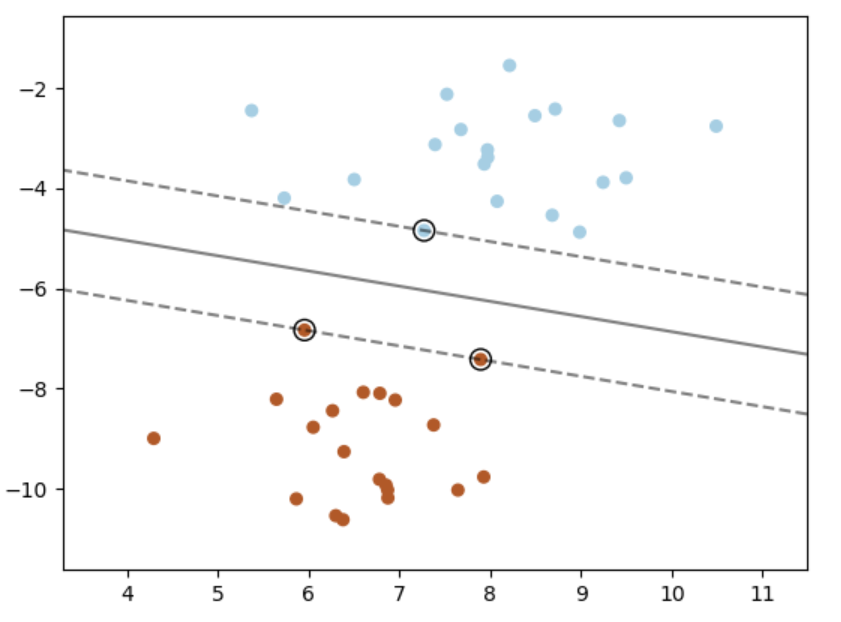

A imagem apresenta um conjunto de dados binários bidimensionais. Nele, o SVM estimaria uma reta (SVC) que melhor classificaria as duas classes, tendo como base os vetores de suporte, que foram estabelecidos em cima das observações mais extremas.

### Kernels

O SVM também tem por objetivo aplicar uma função denominada "Kernel" no banco de dados, de forma a projetar problemas que não são linearmente separáveis para dimensões superiores, onde são linearmente separáveis. Assim, é possível auxiliar o SVM a realizar classificações de maneira mais inteligível. 

O "Truque do Kernel" consiste em não se fazer necessário criar todas as novas dimensões - i.e. transformações das features originais - para se fazer a classificação, o que demandaria um alto gasto computacional. 

Os Kernels definem uma função para o cálculo do **produto interno** entre as features originais, sendo esta a única variável necessária para projetar um SVC n-dimensional na base de dados original, contendo poucas dimensões. Assim, reduzimos a complexidade do código e podemos representar diversas transformações lineares em cima do nosso conjunto de dados original, caso contenham as propriedades de um Kernel de Mercer.

Exemplo: 

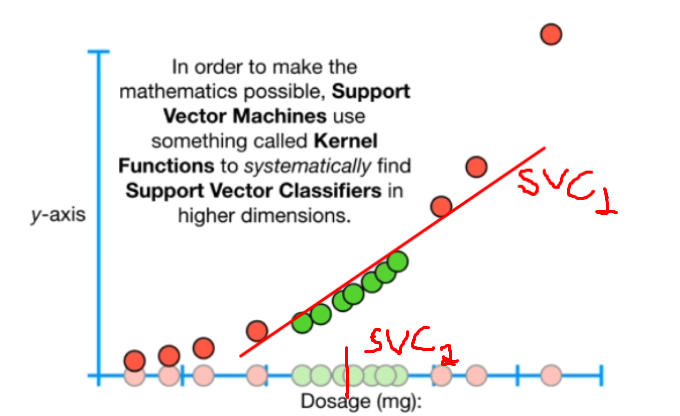

A imagem apresenta um conjunto de dados 1-d representado pela variável independente (dosage) e colorido conforme o valor obtido para a variável dependente. Ao se aplicar uma transformação linear dos dados, temos duas variáveis X representadas por (dosage, dosage^2), tornando possível criar um SVC que classifica as classes corretamente. Note que, no caso unidimensional, não haveria um threshold (ponto de corte, 0-dimensional) que dividiria as amostras corretamente.

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("../dados/titanic.csv")
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis = 1, inplace = True)
df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
df.dropna(inplace = True)
df.head() # Alvo Binário: Survived

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Ajuste do Modelo

In [8]:
modelo = SVC(random_state = 42) # gera um modelo aleatório a cada vez que rodamos o código
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

### Métricas de Avaliação

In [9]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.8358778625954199


In [10]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[139  23]
 [ 20  80]]


In [11]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       162
           1       0.78      0.80      0.79       100

    accuracy                           0.84       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262



In [12]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

AUC - Teste : 0.8290123456790124


### Otimização